In [1]:
import pandas as pd
import os
import json, urllib.request
import numpy as np

Reading the first file: `estacoes-gira-2--semestre-2022.csv`

The join() function from the os.path module creates a path in the format required by the operating system upon which the code is being run (i.e. whatever operating system your computer is running).

In [2]:
# getting the curring working directory
#path = os.getcwd() 
#data_path = os.path.join(path, 'GIRA/')
data_path = '/mnt/d/Dados/FinalProject_GIRA/GIRA'
entries = os.listdir(data_path)

In [3]:
entries

['estacoes-gira-2semestre-2022.csv',
 'JSON_ciclovias.txt',
 'README.md.txt',
 'weather_docas_2020.csv',
 'GIRA_presentation.pdf',
 'GIRA.ipynb',
 'estacoes-gira-1semestre-2022.csv',
 'gira1t2020.xlsx',
 'gira2t2020.xlsx',
 'gira3t2020.xlsx',
 'gira4t2020.xlsx',
 'Gira_2023_05_26.csv',
 'gira_lisboaaberta_one_day2023_05_26.csv',
 'gira---bicicletas-de-lisboa-2021.7z']

In [6]:
df = pd.read_csv(os.path.join(data_path, entries[0]), 
                 parse_dates=['entity_ts'])

In [7]:
df.head(3)

,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado
0,135 - Avenida Cidade de Lourenço Marques / Val...,7,20,"{""coordinates"":[-9.118689,38.764067],""type"":""P...",2022-07-27 15:53:45.206000+00:00,active
1,456 - Entrecampos / Av. das Forças Armadas,18,41,"{""coordinates"":[-9.14872,38.74877],""type"":""Poi...",2022-07-27 15:53:46.819000+00:00,active
2,132 - Avenida de Berlim / Rua Cidade de Cabinda,2,25,"{""coordinates"":[-9.11255,38.76829],""type"":""Poi...",2022-07-27 15:53:44.936000+00:00,active


In [6]:
df.isna().sum()

desigcomercial    0
numbicicletas     0
numdocas          0
position          0
entity_ts         0
estado            0
dtype: int64

## Organizing the data

- The station ID is a string with the station name. I want it as a separate column.
- The coordinates are into a single column and as a string. I want it as a float and in two different columns.

In [9]:
df['station_name'] = df['desigcomercial'].str.split('-').str[1]
df['stationID'] = df['desigcomercial'].str.split('-').str[0].astype(int)
df.drop(columns=['desigcomercial', 'position'], inplace=True)

In [36]:
list(df_sorted.stationID.unique())

[101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 112,
 113,
 114,
 115,
 130,
 131,
 132,
 133,
 134,
 135,
 137,
 139,
 150,
 151,
 203,
 205,
 206,
 208,
 209,
 212,
 213,
 214,
 215,
 216,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 232,
 235,
 237,
 238,
 301,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 351,
 352,
 361,
 362,
 363,
 364,
 365,
 366,
 401,
 403,
 406,
 407,
 408,
 410,
 412,
 413,
 414,
 415,
 416,
 417,
 419,
 420,
 421,
 423,
 426,
 427,
 428,
 430,
 431,
 432,
 433,
 435,
 436,
 442,
 443,
 446,
 449,
 450,
 452,
 453,
 456,
 457,
 459,
 460,
 461,
 462,
 463,
 464,
 468,
 471,
 472,
 473,
 474,
 475,
 476,
 477,
 478,
 479,
 480,
 481,
 483,
 484,
 485,
 486,
 487,
 488,
 490,
 506,
 507,
 508,
 509,
 510,
 513,
 517,
 518,
 519,
 520,
 521,
 550,
 551,
 552,
 553,
 554,
 555,
 556]

In [38]:
df['station_name'][0]

' Avenida Cidade de Lourenço Marques / Vale do'

In [ ]:
df['stationID'].nunique()

## Sorting

I want the data sorted by station ID and timestamp. With this information we could check the diff in the timestamp column and realize that it's not homogeneous. My idea is to transform it into periods of the day: 'morning', 'lunch time', 'afternoon', 'night'.

After sorting, I can calculate the number of bicicles taken by taking the difference in number of bicicles column.

In [11]:
# order the dataframe by stationID and time
df_sorted = df.sort_values(by=['stationID', 'entity_ts']) # 

In [13]:
df_sorted.head(20)

,numbicicletas,numdocas,entity_ts,estado,station_name,stationID
903376,10,16,2022-07-01 00:13:52.742000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101
907126,10,16,2022-07-01 00:13:52.742000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101
1589187,13,16,2022-07-01 01:33:54.511000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101
430100,14,16,2022-07-01 01:53:55.624000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101
1621682,14,16,2022-07-01 01:53:55.624000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101
1987140,14,16,2022-07-01 02:13:55.556000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101
903521,14,16,2022-07-01 02:33:55.790000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101
907271,14,16,2022-07-01 02:33:55.790000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101
1589198,14,16,2022-07-01 02:53:55.796000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101
903649,8,16,2022-07-01 04:13:58.037000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101


In [ ]:
df.shape

## Drop duplicates

By checking the time, I realize there are some duplicates, so we will drop it.

In [15]:
df_sorted.drop_duplicates(inplace=True)

In [16]:
df_sorted.shape

(1235809, 6)

In [17]:
# checking the first station
st101 = df_sorted[df_sorted['stationID'] == 101]

In [18]:
st101.shape

(8522, 6)

In [24]:
st101.loc[:,'diff_time'] = st101.loc[:,'entity_ts'].diff()

/tmp/ipykernel_3988/2308042089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st101.loc[:,'diff_time'] = st101.loc[:,'entity_ts'].diff()


In [29]:
st101.head()

,numbicicletas,numdocas,entity_ts,estado,station_name,stationID,diff_time,total_seconds
903376,10,16,2022-07-01 00:13:52.742000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,0 days 00:00:00,0
1589187,13,16,2022-07-01 01:33:54.511000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,0 days 01:20:01.769000,4801
430100,14,16,2022-07-01 01:53:55.624000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,0 days 00:20:01.113000,1201
1987140,14,16,2022-07-01 02:13:55.556000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,0 days 00:19:59.932000,1199
903521,14,16,2022-07-01 02:33:55.790000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,0 days 00:20:00.234000,1200


In [26]:
st101['diff_time'].replace({pd.NaT: pd.Timedelta("0 days")}, inplace=True)

/tmp/ipykernel_3988/896781163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st101['diff_time'].replace({pd.NaT: pd.Timedelta("0 days")}, inplace=True)


In [28]:
st101['total_seconds'] = st101['diff_time'].apply(lambda x: int(x.total_seconds()))

/tmp/ipykernel_3988/3659728410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st101['total_seconds'] = st101['diff_time'].apply(lambda x: int(x.total_seconds()))


In [30]:
import matplotlib.pyplot as plt

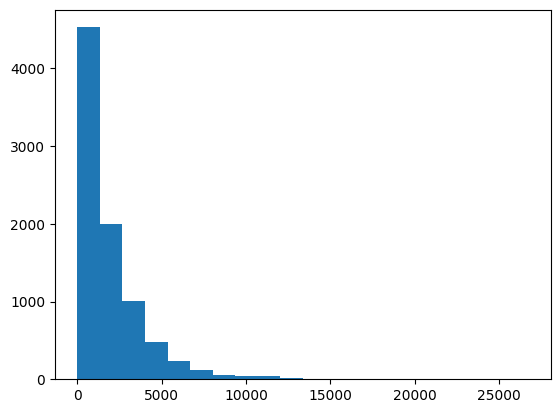

In [33]:
plt.hist(st101['total_seconds'], bins=20);

In [ ]:
plt.scatter(st101['entity_ts'], np.ones(len(st101)), marker='.')

In [ ]:
st101

2382896 observations with distinct time distribution, from 27 of June, 2022 to 16 of February, 2023 (about 6 months long). Info about station name, number of bicicles, number os docs (constant), position information (as string) and a date string. Will be cosidered as time series?

In [ ]:
st101['bike_taken'] = df['numbicicletas'].diff().fillna(0)

# I dont care about the positives values now, so I will set it to zero
st101['bike_taken'][st101['bike_taken'] > 0] = 0

In [ ]:
st101

In [ ]:
plt.bar(st101['entity_ts'], st101['bike_taken']);

## Split the day into periods

In [ ]:
def period_time(x:pd.Series) -> str:
    if x.hour >= 6 and x.hour <= 11:
        return 'morning'
    elif x.hour >= 12 and x.hour <= 15 :
        return 'lunch'
    elif x.hour >= 16 and x.hour <= 20:
        return 'afternoon'
    else:
        return 'night'
  

In [ ]:
st101['period'] = st101['entity_ts'].apply(period_time)

Now the ts can be just the date

In [ ]:
st101['date'] = st101['entity_ts'].dt.date

In [ ]:
st101

In [ ]:
st101.groupby(by=['date','period']).agg({
    'bike_taken': 'sum',
    'stationID': 'last',
    'station_name': 'last',
    'lat': 'last',
    'lon': 'last'
    
})

# Map by time

I think I need to resample the data to hourly and fill up the gaps with the mean between to steps?

In [ ]:
# setting the date to index
df.set_index('entity_ts', drop=True, inplace=True)

In [ ]:
df.head()

In [ ]:
# resample to get data every 1 hour
df_hour = df.resample('H').agg({'numbicicletas': 'mean',
                      'lat': 'last',
                      'lon': 'last',
                      'station_name': 'last',
                      'stationID': 'last',
                      'estado': 'last'})

In [ ]:
# buble map with animation from plotly

import plotly.express as px

fig = px.scatter_geo(data_frame=df_hour, 
                     lat='lat', 
                     lon='lon',
                     color="numbicicletas",
                     hover_name="stationID", #size="numbicicletas",
                     animation_frame=df_hour.index,
                     projection="natural earth",
                     #scope='europe'
                     )
fig.show()